<a href="https://colab.research.google.com/github/umbertogagl97/Tesi/blob/main/Richieste_prof/Istogrammi_GreenBit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import librerie

In [3]:
#Librerie
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

#Collegamento google drive

In [2]:
#collegamento google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Def var

In [ ]:
materiali=['Ecoflex','Gelatine','Latex','LiquidEcoflex','RTV','WoodGlue']

#Path drive

In [6]:
pd_name='preds_adv_IFGSM.xlsx'
pathPreds=F'/content/gdrive/MyDrive/GreenBit_attacks/{pd_name}'

pathPredsOrig=F'/content/gdrive/MyDrive/Dataset_impronte/test/Preds_value/GreenBit_con_normalize.xlsx'

#Fun

In [9]:
def print_acc(pd_preds):
  '''
  stampa accuracy usando il dataframe con le predizioni
  pd_preds: dataframe
  '''
  true_label = pd_preds.real.values
  predicted = pd_preds.predicted.values
  accuracy=round((np.sum((true_label == predicted).astype(int)))/pd_preds.shape[0],4)*100
  print("\nAccuracy: {0}".format(accuracy))
  print("Shape dataframe: {0}".format(pd_preds.shape)) 

#Caricamento dataframe

In [29]:
Test_orig=pd.read_excel(pathPredsOrig)
Test_orig=Test_orig[1000:] #solo le spoof
Test_p=pd.read_excel(pathPreds)

print(Test_orig)
print(Test_p)

     predicted   real  value_pred_live  value_pred_spoof
1000     Spoof  Spoof        -1.388857          1.978444
1001     Spoof  Spoof        -4.021381          4.948711
1002     Spoof  Spoof        -1.157224          1.746312
1003     Spoof  Spoof        -2.919692          3.673729
1004     Spoof  Spoof        -0.811149          1.578893
...        ...    ...              ...               ...
2495     Spoof  Spoof        -6.226919          6.755638
2496     Spoof  Spoof        -6.701868          6.876269
2497     Spoof  Spoof        -2.930325          2.954088
2498     Spoof  Spoof        -2.598931          2.867774
2499     Spoof  Spoof        -6.355600          6.727512

[1500 rows x 4 columns]
                                    name predicted  ...  prob_spoof   real
0     GreenBit_Ecoflex 00-50_004_0_0.png      Live  ...     16.7204  Spoof
1     GreenBit_Ecoflex 00-50_004_0_4.png      Live  ...     14.6301  Spoof
2     GreenBit_Ecoflex 00-50_004_0_5.png      Live  ...     19.667

In [37]:
print(Test_orig.predicted.values[0])

Spoof


In [43]:
Test_orig=Test_orig.loc[Test_orig['real']==Test_orig['predicted']]

In [ ]:
#aggiungi i nomi delle immagini a Test_orig e ricaricalo su Drive

In [30]:
print_acc(Test_orig)
print_acc(Test_p)


Accuracy: 98.0
Shape dataframe: (1500, 4)

Accuracy: 0.0
Shape dataframe: (1500, 5)


<BarContainer object of 3 artists>

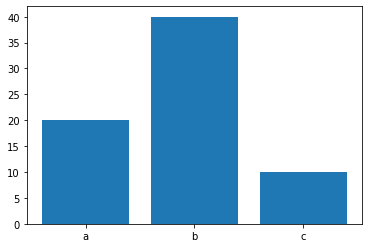

In [27]:
#x = np.arange(3)
x=['a','b','c']
y=[20,40,10]
#plt.xticks(x, ['a','b','c'])
plt.bar(x, height=y)
#poni come x i materiali e come height quante img sono perturbate bene